Importint libraries:

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Read & Load CSV file:

In [44]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\iris_svm.csv",encoding='latin1')

Basic data understanding:

In [45]:
print("First 5 Rows:",df.head())
print("Shape:",df.shape)
print("Column names:",df.columns)
print("Data type:",df.dtypes)
print(df.isnull().sum())
print(df.duplicated().sum())
print("Data summary:",df.describe())
print(df['species'].value_counts())

First 5 Rows:    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Shape: (150, 5)
Column names: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
Data type: sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species    

EDA:

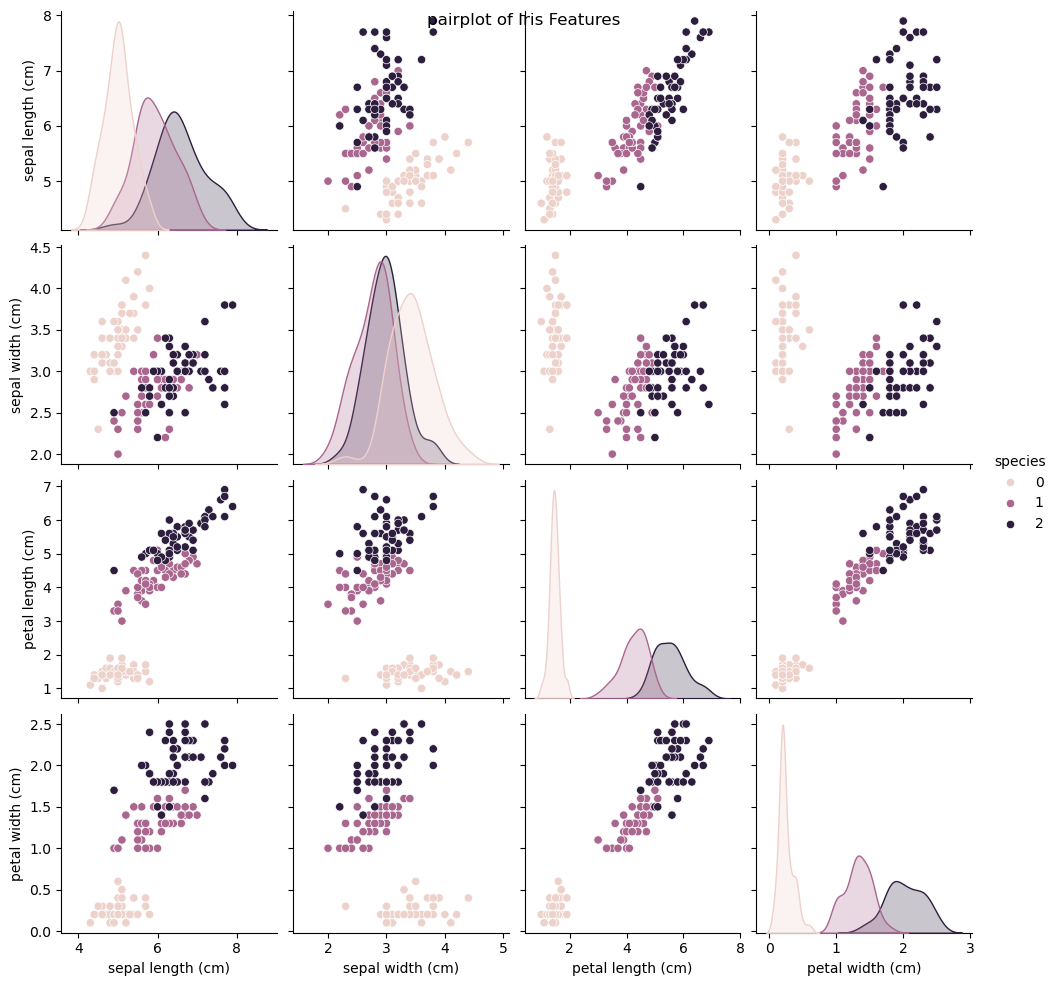

In [46]:
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("pairplot of Iris Features")
plt.show()

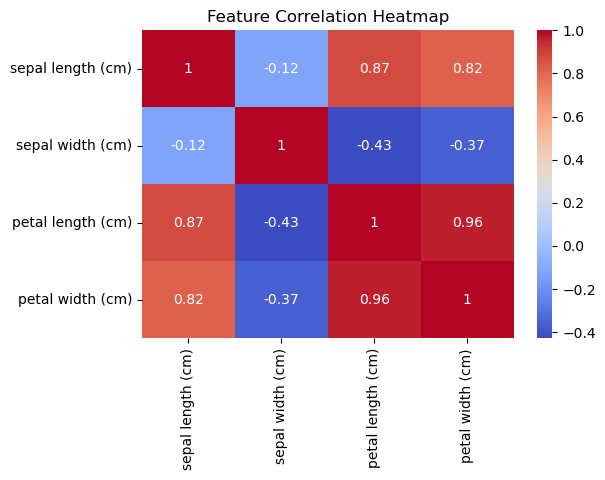

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(df.iloc[:, :-1].corr(),annot=True,cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Task:

In [48]:
X=df.iloc[:,:-1].values
y=df['species'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

svm_clf = SVC(kernel="rbf", gamma="scale", C=1.0)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



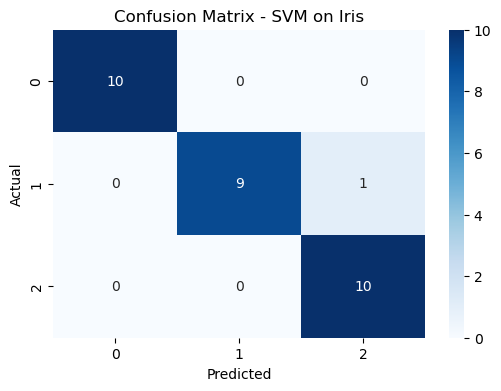

Prediction for [5.5, 3.0, 4.2, 1.3]: 1


In [60]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM on Iris")
plt.show()

sample = np.array([[5.5, 3.0, 4.2, 1.3]])   
prediction = svm_clf.predict(sample)
print(f"Prediction for [5.5, 3.0, 4.2, 1.3]: {prediction[0]}")